## EXPLORE AI ACADEMY INTERNSHIP TEAM 2301-09


### EXPLORATORY DATA ANALYSIS

This notebook focuses on analysis performed on our dataset. This analysis helped the team uncover insights in our dataset and also informed our selection of features for model building.

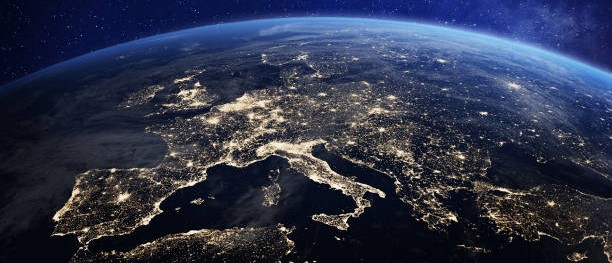

##### IMPORT DEPENDENCIES

In [17]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Libraries for data preparation 
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

LOAD AND VIEW THE DATA

In [60]:
# Load the data
df_gdp = pd.read_csv('SA_gdp_by_province.csv')

In [3]:
print(df_gdp.shape)
df_gdp.head()

(225, 14)


year  Agriculture, forestry and fishing  Mining and quarrying   
0  1995                        4942.731047            442.546983  \
1  1996                        5297.576761            421.524437   
2  1997                        5855.780107            230.731253   
3  1998                        6098.182642            256.872962   
4  1999                        6187.449779            249.964157   

   Manufacturing  Electricity, gas and water  Construction   
0    17263.25801                 1637.212870   3367.844365  \
1    18507.58246                 1682.899429   3452.603466   
2    20147.38759                 1715.592387   4057.259535   
3    20930.73122                 1861.780047   4158.673691   
4    21760.05796                 1994.539223   4724.246717   

   Trade, catering and accommodation  Transport, storage  and communication   
0                        10881.09145                            6902.876448  \
1                        12185.92732                            8038.513784   
2                        13213.85587                            9116.956886   
3                        14180.32519                           10357.759340   
4                        16462.89243                           11358.123830   

   Finance, real estate and business services  Personal services   
0                                 16740.44129        3595.257547  \
1                                 18154.31188        4051.599287   
2                                 21358.58799        4578.100207   
3                                 22545.58230        5082.493591   
4                                 26784.22271        5739.894071   

   General government services  Taxes less subsidies on products   
0                  8770.439792                       6636.710172  \
1                 10913.416890                       7140.929873   
2                 16852.229050                       8023.164478   
3                 12236.036640                       9045.114506   
4                 12843.130810                      10163.447810   

   GDPR at market prices      province  
0            81180.40997  Western Cape  
1            89846.88559  Western Cape  
2           105149.64530  Western Cape  
3           106753.55210  Western Cape  
4           118267.96950  Western Cape

**RENAME COLUMNS**

This section addresses the need to modify the column names in a dataset for improved legibility during Exploratory Data Analysis (EDA). Lengthy column names can be challenging to work with when creating visualizations. In this section, the code or process for renaming these columns is typically provided.

Additionally, to enhance clarity, we have provided a description of the new column names. This description helps users or readers of the dataset understand the meaning and relevance of each column, making it easier to interpret the data and its visual representations during EDA.


In [61]:
# Rename multiple columns
columns_to_rename = list(df_gdp.drop(["year", "province"], axis=1).columns)

# Define new column names 
new_col_names = ["agriculture", "mining", "manufacturing", "utility", "construction", "retail", "transport", "finance", "personal", "government", "tax less subsidy", "gdpr"]
new_columns = dict()
for old, new in zip(columns_to_rename, new_col_names):
    new_columns[old] = new
    
df_gdp = df_gdp.rename(columns=new_columns)

DESCRIPTION OF COLUMNS

    - Agriculture, forestry and fishing          - agriculture
    - Mining and quarrying                       - mining
    - Manufacturing                              - manufacturing
    - Electricity, gas and water                 - utility
    - Construction                               - construction
    - Trade, catering and accommodation          - retail
    - Transport, storage and communication       - transport
    - Finance, real estate and business services - finance
    - Personal services                          - personal
    - General government services                - government
    - Taxes less subsidies on products           - tax less subsidy
    - province                                   - province
    - year                                       - year
    - GDPR at market prices                      - gdpr

##### UNDERSTANDING THE GENERAL DATA STATS

We will be working with data from 2008 - 2019, so we filtered that and saved it as a new dataframe

In [62]:
# Filter rows where 'year' is between 2008 and 2019
df_data = df_gdp[(df_gdp['year'] >= 2008) & (df_gdp['year'] <= 2020)]

# Reset the index of the filtered DataFrame
df_data.reset_index(drop=True, inplace=True)

# Save as csv for reusuability
df_data.to_csv('economic_data_for_EDA.csv', index=False)

In [6]:
# Viewing the size of the data
df_data.shape

(108, 14)

In [7]:
# Checking the datatypes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              108 non-null    int64  
 1   agriculture       108 non-null    float64
 2   mining            108 non-null    float64
 3   manufacturing     108 non-null    float64
 4   utility           108 non-null    float64
 5   construction      108 non-null    float64
 6   retail            108 non-null    float64
 7   transport         108 non-null    float64
 8   finance           108 non-null    float64
 9   personal          108 non-null    float64
 10  government        108 non-null    float64
 11  tax less subsidy  108 non-null    float64
 12  gdpr              108 non-null    float64
 13  province          108 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 11.9+ KB


In [58]:
# Checking for duplicates
df_data.duplicated().sum()

0

In [9]:
# Some basic statistics
df_data.describe()

year   agriculture         mining  manufacturing       utility   
count   108.000000    108.000000     108.000000     108.000000    108.000000  \
mean   2013.500000   9178.467074   31515.713544   49965.224873  12707.275211   
std       3.468146   6144.387535   29004.699764   56075.967916  11110.977038   
min    2008.000000   3141.503185     473.696381    1528.690840    949.929249   
25%    2010.750000   5267.546664    8152.210036   10368.859117   5044.913886   
50%    2013.500000   6652.365678   20795.966785   26749.449105   9037.474217   
75%    2016.250000  10372.782413   56813.708880   73064.270247  16418.367363   
max    2019.000000  27587.065420  100400.011300  237767.003400  53078.175260   

       construction         retail      transport        finance   
count    108.000000     108.000000     108.000000     108.000000  \
mean   14638.289077   54557.905786   36443.089071   74388.955263   
std    13987.699012   45177.552903   36675.227801   84218.400231   
min     1302.229940    5453.238530    5145.928957    6012.306582   
25%     5235.013297   25347.234673   11919.603367   25043.548815   
50%     8799.565451   38666.964375   18684.037000   36837.021335   
75%    21382.184915   70960.375387   49345.237893   94516.397885   
max    60731.029600  217497.572700  157320.194700  373074.629400   

           personal     government  tax less subsidy          gdpr  
count    108.000000     108.000000        108.000000  1.080000e+02  
mean   21625.302514   62754.804276      42054.909935  4.098299e+05  
std    17040.363376   66943.401191      37840.175220  3.600397e+05  
min     2619.744568    6782.949470       4966.678090  5.444641e+04  
25%    10015.964242   25968.114805      18825.030265  1.911469e+05  
50%    16236.074480   39944.396320      31011.341115  2.913666e+05  
75%    28506.302967   66267.513128      47147.176210  4.817480e+05  
max    81814.638810  332884.690300     191737.729500  1.750062e+06

In [10]:
df_data.describe(include = 'object')

province
count            108
unique             9
top     Western Cape
freq              12

In [7]:
provinces =df_data['province'].unique()
provinces

array(['Western Cape', 'Eastern Cape', 'Northern Cape', 'Free State',
       'KwaZulu-Natal', 'North West', 'Gauteng', 'Mpumalanga', 'Limpopo'],
      dtype=object)

In [8]:
# Checking for missing values
df_data.isna().sum()

year                0
agriculture         0
mining              0
manufacturing       0
utility             0
construction        0
retail              0
transport           0
finance             0
personal            0
government          0
tax less subsidy    0
gdpr                0
province            0
dtype: int64

In [13]:
# Checking the distribution of each column

df_data.skew(numeric_only = True)

year                0.000000
agriculture         1.412450
mining              0.733422
manufacturing       1.616798
utility             1.699581
construction        1.542907
retail              1.641202
transport           1.650813
finance             2.039000
personal            1.517293
government          2.447847
tax less subsidy    2.120044
gdpr                1.997317
dtype: float64

In [14]:
# Checking for outliers

df_data.kurtosis(numeric_only = True)

year               -1.217371
agriculture         0.815160
mining             -0.724859
manufacturing       2.052719
utility             2.888107
construction        1.864827
retail              2.723965
transport           2.008989
finance             3.639269
personal            2.150428
government          5.910311
tax less subsidy    4.698908
gdpr                3.900982
dtype: float64

__OBSERVATIONS:__

- There are no missing Values
- Based on the kurtosis values observed, seems there are outliers but we need to be sure that these are not actual data points. If these are actual data points, then it implies that the columns like government and finance with high kurtosis values have relatively extreme values in them.
- From the result of the skewness, we observed that apart from the year column, other columns seem to be positively skewed. The year column has a relatively flat distribution
- There are no duplicate values
______

### UNIVARIATE ANALYSIS

This involves carrying out individual analysis and visualisation on the independent variables in the data set over the given period.

In [64]:
df_data2 = df_data.drop(['year', 'gdpr'], axis=1) #drop the year and gdpr column before proceeding
num_features = [col for col in df_data2.columns if df_data2[col].dtype != 'object']
num_features

['agriculture',
 'mining',
 'manufacturing',
 'utility',
 'construction',
 'retail',
 'transport',
 'finance',
 'personal',
 'government',
 'tax less subsidy']

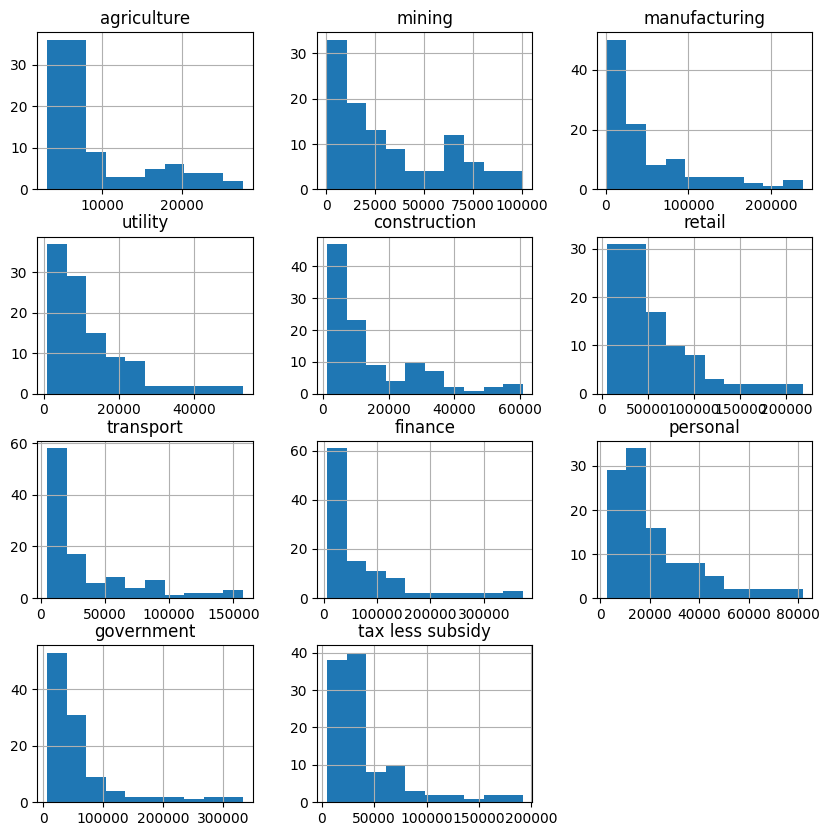

In [65]:
df_data[num_features].hist(figsize=(10,10));

----------

### PROVINCE-WISE ANALYSIS

- Count plot to check the distribution of provinces
- Line plot to visualize the GDP trends for the provinces over the years
- Donut or Pie chart to visualize the percentage contribution of each province

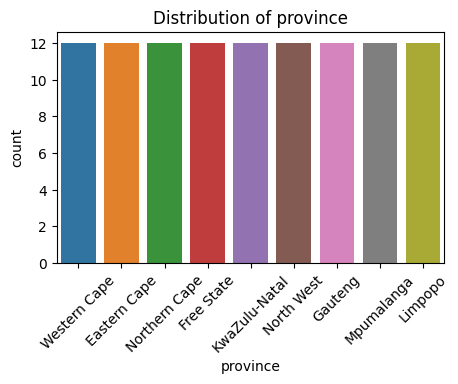

In [66]:
# COUNT PLOT

plt.figure(figsize = (5,3))
sns.countplot(x = 'province', data = df_data)
plt.title(f"Distribution of province")
plt.xticks(rotation=45);

In [11]:
# INTERACTIVE LINE PLOT - GDP Trends for Different Provinces Over the Years

# Create the line plot
fig = px.line(df_data, x='year', y='gdpr', color='province', title='GDP Trends by Province (2008-2019)')

# Customize the hover information
fig.update_traces(mode='lines+markers', hovertemplate='%{x}: %{y} GDP<br>')

# Set the axis titles and legend title
fig.update_layout(xaxis_title='Year', yaxis_title='GDPR', legend_title='Province')

# Change the background color
fig.update_layout(plot_bgcolor='white') #color options - 'lightgray'

#Set grid lines to show
fig.update_xaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')
fig.update_yaxes(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightgrey')

fig.show()

In [21]:
# INTERACTIVE DONUT CHART

data = df_data.copy()

# Calculate the total GDP for all provinces
total_gdp = data['gdpr'].sum()

# Calculate the percentage GDP for each province
data['percentage_gdp'] = (data['gdpr'] / total_gdp) * 100

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=data['province'], values=data['percentage_gdp'], hole=.3)])

fig.update_layout(title_text='Percentage GDP Distribution by Province')
fig.show()

#### OBSERVATION

- Relatively high upward-sloping trend line observed for Gauteng province indicating positive economic growth (GDP)
- Nothern cape has an almost flat line which indicates little growth in GDP over time.
- Notice some overlapping trends between multiple provinces ie: Eastern cape, Mpumalanga which may indicate a strong positive correlation between the economies of those provinces.
- The pie-chart reveals that Gauteng generated over one third of the country's GDP and Nothern Cape generating the least.


-----------

### SECTOR-/INDUSTRY-WISE ANALYSIS

This will give us an idea of which sector contributes more to the economic growth. We can explore this analysis in the following ways
- Line plot to visualize GDP for various sectors
- Pie chart to visualize the percentage contribution of each sector for specific province

In [13]:
#SECTOR-WISE GDP TREND OVER TIME

# Define a function to create line plots for different sectors
def create_sector_line_plot(df, sector_name):
    melted_data = pd.melt(df_data, id_vars=['year', 'province'], value_vars=[sector_name], 
                          var_name='sector', value_name='gdp')
    fig = px.line(melted_data, x='year', y='gdp', color='province', title=f'GDP Trends by sector-{sector_name.capitalize()}', labels={'gdp': 'GDP'})
    fig.update_traces(mode='lines+markers')  # Add markers to lines
    return fig

# List of sectors
sectors = ['agriculture', 'mining', 'manufacturing', 'utility', 'construction', 'retail', 'transport', 'finance', 'personal', 'government']

# Create subplots
fig = make_subplots(rows=5, cols=2, subplot_titles=[f'Sector: {s.capitalize()}' for s in sectors])

# Populate subplots with line plots for each sector
for i, sector in enumerate(sectors, 1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    line_fig = create_sector_line_plot(df_data, sector)
    for trace in line_fig.data:
        fig.add_trace(trace, row=row, col=col)

# Update the layout of subplots
fig.update_layout(title_text='GDP Trends by Sector and Province', showlegend=False)

# Customize subplot layout (you can adjust the height and width as needed)
fig.update_layout(height=1000, width=1000, title_font=dict(size=18))

# Show subplots
fig.show()

In [16]:
# Melt the DataFrame to convert sectors into a single column
melted_df = pd.melt(df_data, id_vars=['year', 'province'], value_vars=['agriculture', 'mining', 
                'manufacturing', 'utility', 'construction', 'retail', 'transport', 'finance', 'personal',
                            'government', 'tax less subsidy'], var_name='sector', value_name='gdp')
melted_df

year      province            sector          gdp
0     2008  Western Cape       agriculture  14905.01417
1     2009  Western Cape       agriculture  14933.19498
2     2010  Western Cape       agriculture  14523.56480
3     2011  Western Cape       agriculture  15602.88449
4     2012  Western Cape       agriculture  15721.16851
...    ...           ...               ...          ...
1183  2015       Limpopo  tax less subsidy  31014.14592
1184  2016       Limpopo  tax less subsidy  34538.13074
1185  2017       Limpopo  tax less subsidy  35767.83254
1186  2018       Limpopo  tax less subsidy  40113.40719
1187  2019       Limpopo  tax less subsidy  40800.84900

[1188 rows x 4 columns]

In [17]:
# Percentage GDP by Sector for All Provinces (2008-2019)'

# Get a list of unique province names
province_names = melted_df['province'].unique()

# Create a subplot with 3 rows and 3 columns to display 9 pie charts
fig = make_subplots(rows=3, cols=3, subplot_titles=province_names, specs=[[{'type':'pie'}]*3]*3, 
                    vertical_spacing=0.09,  # Adjust vertical spacing between subplots
                    horizontal_spacing=0.1,  # Adjust horizontal spacing between subplots
                    shared_xaxes=False,  # Ensure x-axes are not shared
                    shared_yaxes=False)  # Ensure y-axes are not shared

# Iterate through each province and create a donut chart for each
for i, province_name in enumerate(province_names, 1):
    province_data = melted_df[melted_df['province'] == province_name].copy()

    # Calculate the total GDP for the province
    total_gdp_province = province_data['gdp'].sum()

    # Calculate the percentage GDP contribution for each sector in the province
    province_data['percentage_gdp'] = (province_data['gdp'] / total_gdp_province) * 100

    # Create a donut chart for the current province and add it to the subplot
    donut_chart = px.pie(province_data, names='sector', values='percentage_gdp',hole=0.4)  # Adjust the hole parameter to create a donut chart
    
    # Adjust the size of the chart by setting height and width
    donut_chart.update_layout(height=300, width=300)  # Adjust height and width as needed
    
    # Customize the font size of the inside text
    donut_chart.update_traces(textinfo='percent', insidetextfont=dict(size=7.5))  # Adjust the inside text font size
    
    # Customize the font size of the outside text
    donut_chart.update_traces(outsidetextfont=dict(size=7.5))  # Adjust the outside text font size
      
    fig.add_trace(donut_chart.data[0], row=(i-1)//3+1, col=(i-1)%3+1)

# Update the layout of the subplot
fig.update_layout(title_text='Percentage GDP by Sector for All Provinces (2008-2019)')


# Show the subplot with 9 donut charts
fig.show()

#### OBSERVATIONS

- Observe a heavy representation of Finance, government, manufacturing and retail in Guateng, This could explain why this province generates over a third of the nations GDP.
- The importance of government as a key influence of economic activity can be seen by its representation as the largest industry in Eastern cape and free state and 2nd largest in Gauteng, Limpopo and 4 other provinces.
- Mining is the largest industry in North west, Limpopo, Mpumalanga and Northern cape.

## MULTIVARIATE ANALYSIS

### Correlation Analysis

To understand how different economic sectors are correlated with each other, we calculate and visualize the correlation matrix 

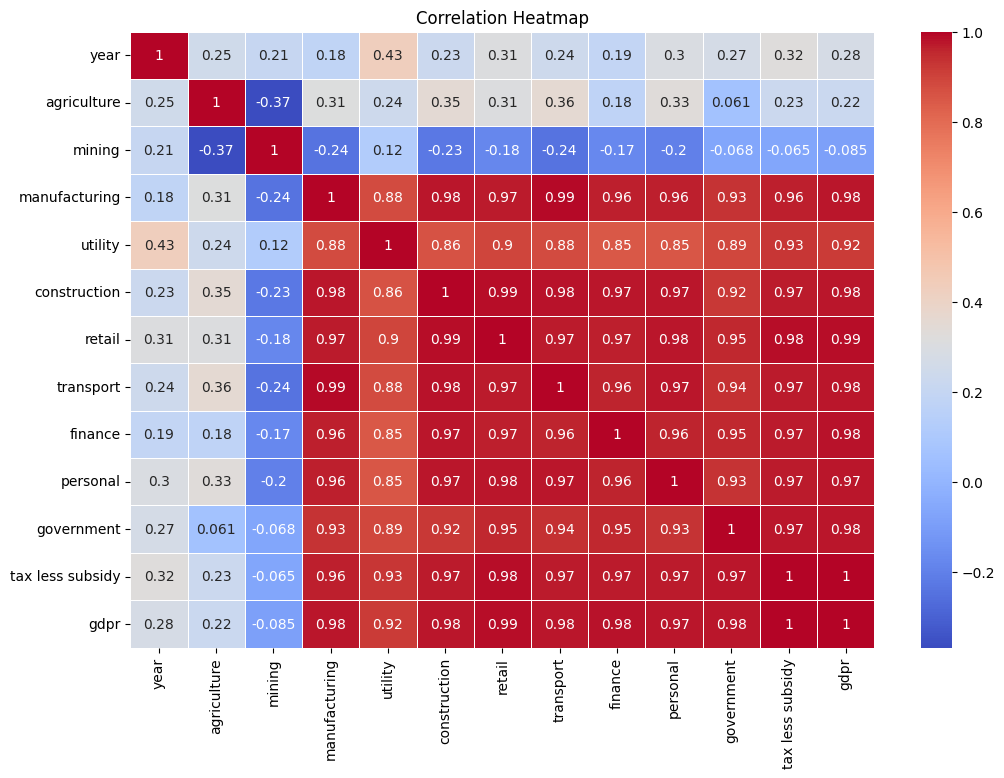

In [51]:
# Calculate the correlation matrix
corr = df_data.corr(numeric_only = True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### OBSERVATIONS

Observe a very high correlation between these industries - manufacturing, utility, construction, retail, transport, finance, personal, government - This could be interpreted in so many ways, viz:

- High correlation between these industries could mean that they are closely interconnected in the economy. For example a , a recession in the financial sector can slowdown economic activity,lead to job losses, less production etc.

- A high correlation between two or more independent variables can also be interpreted as Multicollinearity. This can make it challenging to identify the individual impact of each industry on our dependent variable i.e GDP. So we'll be careful to observe how this affects the model and take necessary actions.

In [ ]:
# Calculate the correlation matrix
corr = df_data.corr(numeric_only = True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [239]:
# Calculate correlations between the independent variables and the response variable
corrs = df_data.corr(numeric_only = True)['gdpr'].sort_values(ascending=False)

corrs

gdpr                1.000000
tax less subsidy    0.996898
retail              0.985593
finance             0.981132
construction        0.976852
transport           0.975893
manufacturing       0.975333
government          0.975276
personal            0.973567
utility             0.919303
year                0.276031
agriculture         0.223951
mining             -0.084657
Name: gdpr, dtype: float64

In [241]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'gdpr']
for col in column_titles:
    p_val = round(pearsonr(data[col], data['gdpr'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
data_cp = pd.DataFrame(dict_cp).T
data_cp_sorted = data_cp.sort_values('P_Value')
data_cp_sorted

Correlation_Coefficient   P_Value
tax less subsidy                 0.996898  0.000000
retail                           0.985593  0.000000
finance                          0.981132  0.000000
construction                     0.976852  0.000000
transport                        0.975893  0.000000
manufacturing                    0.975333  0.000000
government                       0.975276  0.000000
personal                         0.973567  0.000000
utility                          0.919303  0.000000
year                             0.276031  0.003833
agriculture                      0.223951  0.019808
mining                          -0.084657  0.383693

#### OBSERVATIONS
- There is a strong Positive Correlations of the "tax less subsidy," "retail," "finance," "construction," "transport," "manufacturing," "government," and "personal" variables with GDP ("gdpr"). This suggests that as these variables increase, GDP tends to increase as well. These industries and factors are likely positively contributing to the economic output.

- "Utility" also has a positive correlation with GDP, but it's slightly weaker compared to the other industries listed above. It still has a noticeable positive impact on GDP.

- "Year" and "agriculture" have weak positive correlation with GDP. "Year" suggests a modest positive relationship with time, indicating that GDP has increased over the years. "Agriculture" also has a positive but relatively weak association with GDP.

- "Mining" has a weak negative correlation with GDP. This suggests that there may be a slight negative relationship between mining activities and GDP, but the correlation is not very strong.

__NOTE__ that correlation does not imply causation, and these insights are based solely on the strength and direction of the linear relationships between variables. Further analysis, including modeling and domain knowledge, is needed to understand the causal relationships and make informed decisions about feature selection and model building. 

### NEXT 

- We explore relationships between GDP and Night light intensity


In [2]:
# Load the merged light intensity and GDP data 
merged_df = pd.read_csv('SA_GDP_estimation_dataset.csv')
merged_df.head()

province  year   jan_sum  jan_mean  jan_percentage_light   feb_sum   
0  western_cape  2012  165691.9     0.117               0.00531  165691.9  \
1  western_cape  2013  191889.0     0.136               0.00735  194161.0   
2  western_cape  2014  183962.0     0.130               0.00502  195554.0   
3  western_cape  2015  207833.0     0.147               0.00686  236952.0   
4  western_cape  2016  252550.0     0.179               0.01860  243283.0   

   feb_mean  feb_percentage_light   mar_sum  mar_mean  ...   nov_sum   
0     0.117               0.00531  165691.9     0.117  ...  178418.0  \
1     0.137               0.00962  187756.0     0.133  ...  194433.0   
2     0.138               0.00764  177461.0     0.125  ...  207969.0   
3     0.168               0.01153  195279.0     0.138  ...  195415.0   
4     0.172               0.01577  198795.0     0.141  ...  212586.0   

   nov_mean  nov_percentage_light   dec_sum  dec_mean  dec_percentage_light   
0     0.126               0.00686  175655.0     0.124               0.00622  \
1     0.137               0.00622  205800.0     0.146               0.00820   
2     0.147               0.00792  199447.0     0.141               0.00629   
3     0.138               0.00552  189589.0     0.134               0.00460   
4     0.150               0.00679  221759.0     0.157               0.01040   

   avg_sum_of_intensity  avg_mean  sum_of_percentage_light         GDPR  
0              165692.0    0.1171                    0.064  447228.3763  
1              190392.0    0.1348                    0.079  486784.9499  
2              190360.0    0.1346                    0.076  517720.1873  
3              199333.0    0.1410                    0.082  552539.4773  
4              205958.0    0.1458                    0.095  596895.7015  

[5 rows x 42 columns]

#### Temporal Trends:

Plot time series graphs to visualize how the satellite-derived features change over the years. This can help identify any patterns or trends.

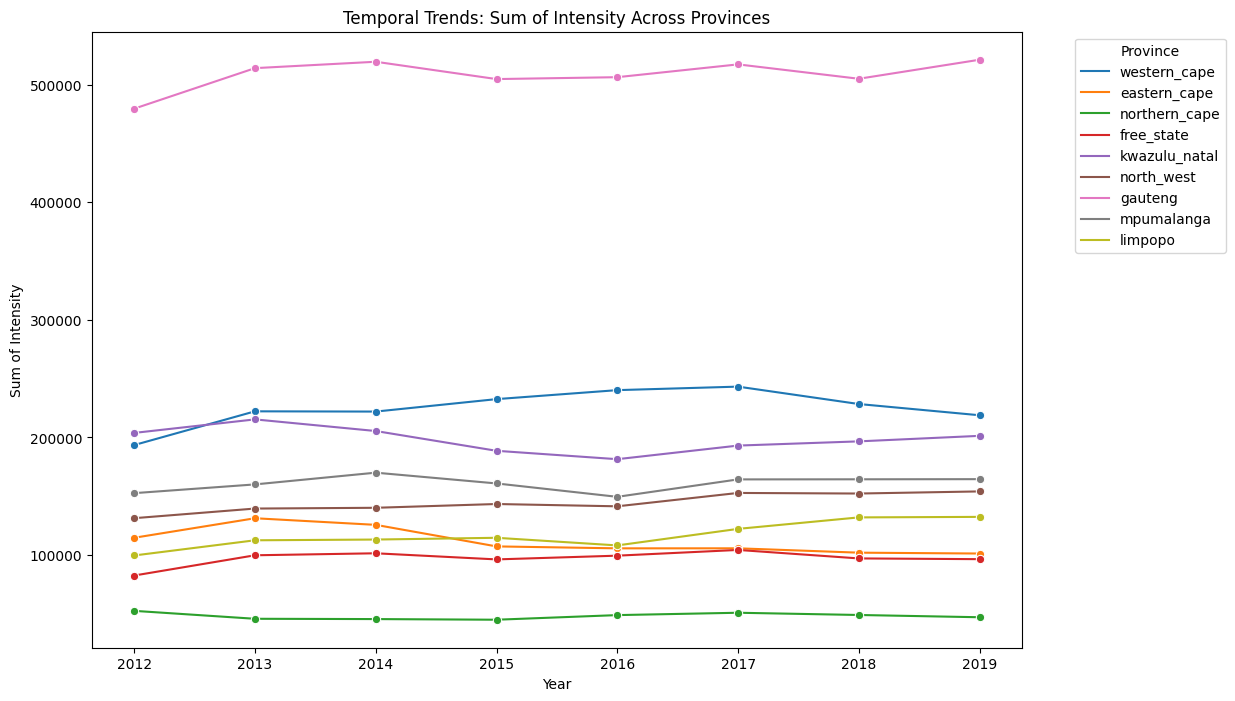

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='avg_sum_of_intensity', hue='province', data=merged_df, marker='o')
plt.xlabel('Year')
plt.ylabel('Sum of Intensity')
plt.title('Temporal Trends: Sum of Intensity Across Provinces')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Correlation Analysis

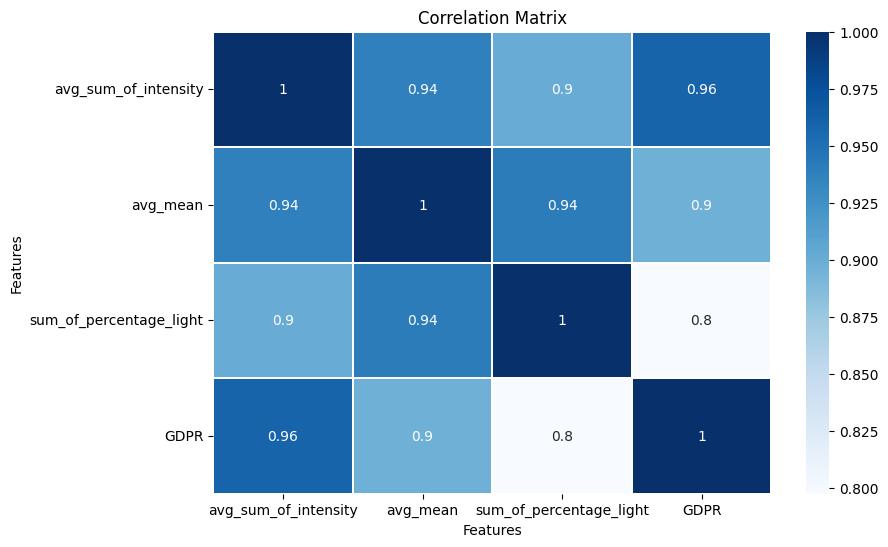

In [24]:
import seaborn as sns

correlation_matrix = merged_df[['avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light', 'GDPR']].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.2)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Save the plot as an image file 
plt.savefig('correlation_heatmap.png')
plt.show()


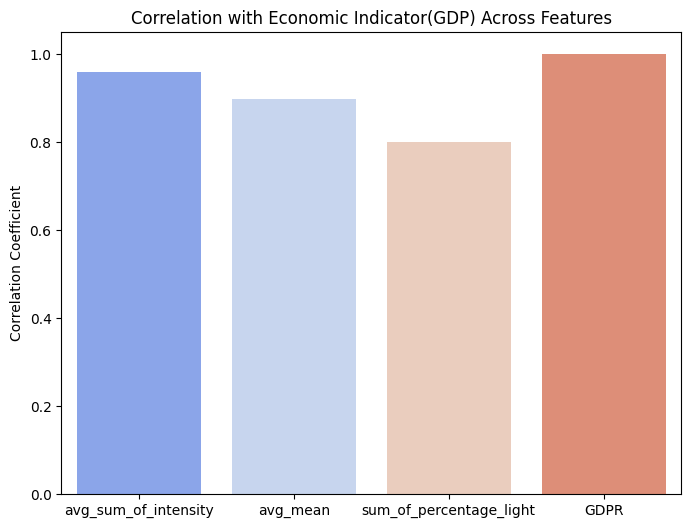

In [4]:
# Assuming 'merged_df' contains relevant columns for correlation analysis
correlation_with_target = merged_df[['avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light', 'GDPR']].corr()['GDPR']

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation with Economic Indicator(GDP) Across Features')
plt.ylabel('Correlation Coefficient')

# Save the plot as an image file 
plt.savefig('correlation_barplot.png')
plt.show()

From the correlation analysis it is clear that there is a strong positive linear relationship (correlation) between the average sum of intensity and average mean, with the GDPR; which implies that as these features increases, the GDPR tends to increase as well

This suggests that these satellite-derived features may serve as key drivers or indicators of economic activity. Stakeholders can focus on these features when assessing economic trends. Thus enabling them to effectively allocate resources.

In [16]:
# Checking for multi-collinearity amongst the independent data
corr_matrix = merged_df[['avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light']].corr()

# Display the correlation matrix
corr_matrix


avg_sum_of_intensity  avg_mean   
avg_sum_of_intensity                 1.000000  0.937692  \
avg_mean                             0.937692  1.000000   
sum_of_percentage_light              0.900526  0.940988   

                         sum_of_percentage_light  
avg_sum_of_intensity                    0.900526  
avg_mean                                0.940988  
sum_of_percentage_light                 1.000000

The correlation matrix shows high correlations between the independent variables:

- avg_sum_of_intensity and avg_mean have a very high positive correlation of 0.937692.
- avg_sum_of_intensity and sum_of_percentage_light also have a high positive correlation of 0.900526.
- avg_mean and sum_of_percentage_light have a very high positive correlation of 0.940988.

These high correlation coefficients suggest the presence of multicollinearity. Multicollinearity can make it challenging to isolate the individual effects of predictors on the target variable in a regression model.

#### Possible Actions:

Dropping one of the highly correlated variables. In our case, given the high correlation between avg_sum_of_intensity and avg_mean, we will drop one during the modelling phase. 

### Distribution of Intensity over Time for each Province

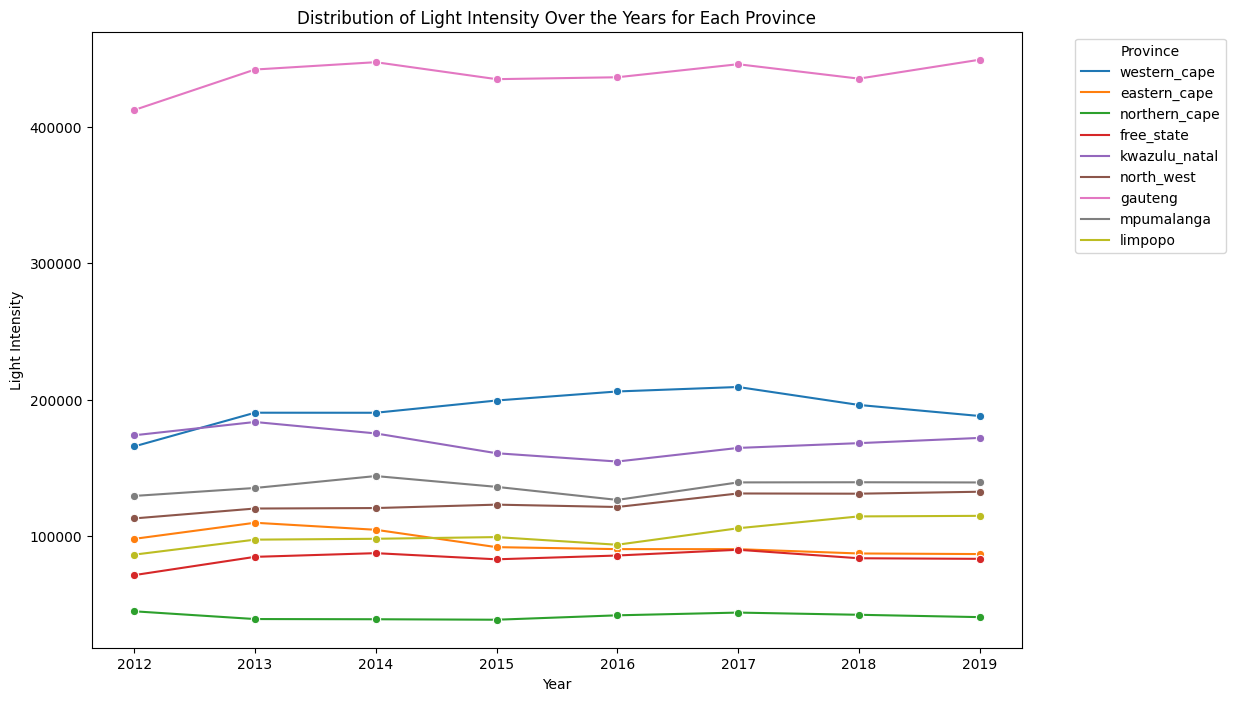

In [5]:
# Distribution of Light Intensity Over the Years for Each Province

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='avg_sum_of_intensity', hue='province', data=merged_df, marker='o')
plt.title('Distribution of Light Intensity Over the Years for Each Province')
plt.xlabel('Year')
plt.ylabel('Light Intensity')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()